In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

In [2]:
data = {
    'Exp': [1, 2, 3, 4, 5,6,7,8,9],
    'Sal': [30, 40, 60, 70,80,90,100,110,120]  # Perfect linear: y = 10*x + 20
}


df = pd.DataFrame(data)

In [3]:
X = df[['Exp']]
y = df['Sal']

# Linear Regression

In [4]:
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_pred = model.predict(X)
y_pred = pd.Series(y_pred)

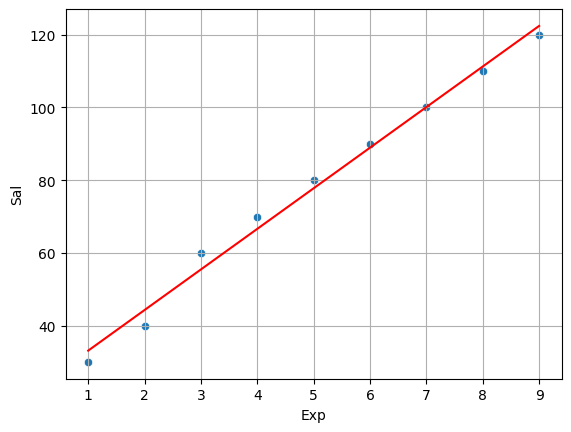

In [6]:
sns.scatterplot(x= df['Exp'],y = df['Sal'])
plt.plot(df['Exp'], y_pred, color='red')
plt.grid() 

# Elastic Net

In [7]:
# modelling
model = ElasticNet()
param_grid = {'alpha':list(range(1,70)),'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

grid  = GridSearchCV(model,param_grid,cv = 5)
grid.fit(X,y)
grid.best_params_

{'alpha': 1, 'l1_ratio': 0}

In [8]:
el_net = ElasticNet(alpha= 1, l1_ratio= 0)
el_net.fit(X,y)

,alpha,1
,l1_ratio,0
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [9]:
y_pred = el_net.predict(X)
y_pred = pd.Series(y_pred)

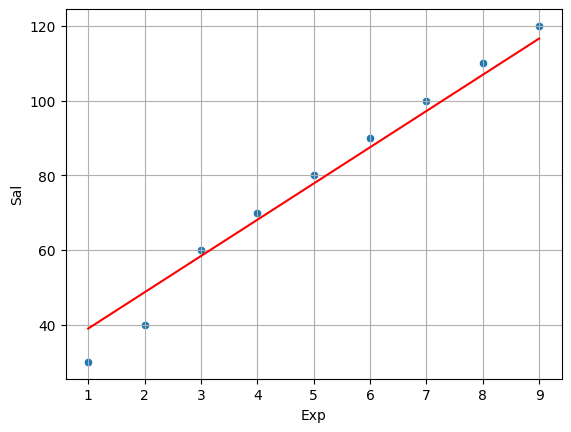

In [10]:
sns.scatterplot(x= df['Exp'],y = df['Sal'])
plt.plot(df['Exp'], y_pred, color='red')
plt.grid()

# Ridge

In [11]:
model = Ridge()
param_grid = {'alpha':list(range(1,10))}

grid  = GridSearchCV(model,param_grid,cv = 5)
grid.fit(X,y)
grid.best_params_

{'alpha': 1}

In [12]:
ridge_best = Ridge(alpha = 1)
ridge_best.fit(X,y)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [13]:
y_pred = el_net.predict(X)
y_pred = pd.Series(y_pred)

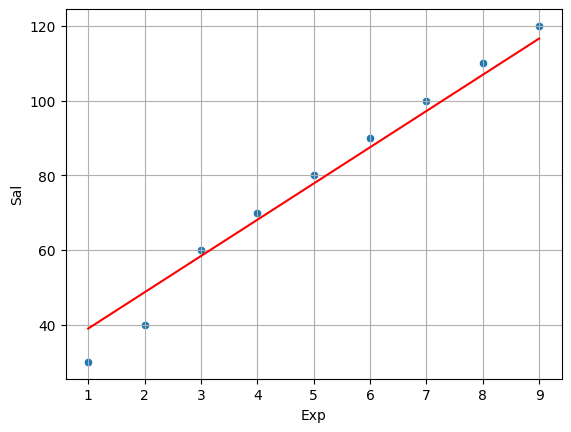

In [14]:
sns.scatterplot(x= df['Exp'],y = df['Sal'])
plt.plot(df['Exp'], y_pred, color='red')
plt.grid() 

# Lasso

In [15]:
model = Lasso()
param_grid = {'alpha':list(range(1,10))}
grid  = GridSearchCV(model,param_grid,cv = 5)
grid.fit(X,y)
grid.best_params_

{'alpha': 1}

In [16]:
lasso_best = Lasso(alpha = 1)
lasso_best.fit(X,y)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [17]:
y_pred = el_net.predict(X)
y_pred = pd.Series(y_pred)

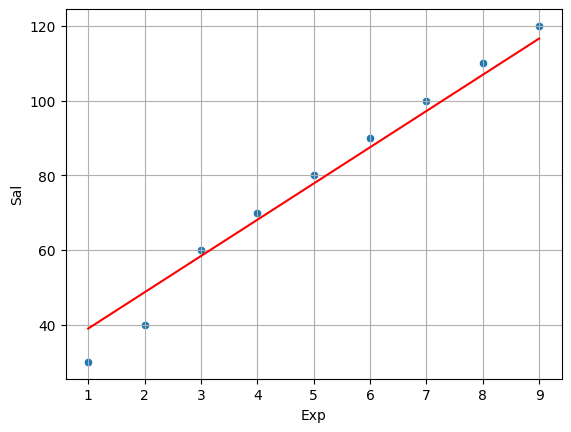

In [18]:
sns.scatterplot(x= df['Exp'],y = df['Sal'])
plt.plot(df['Exp'], y_pred, color='red')
plt.grid() 

# Pollynomial Regression 

In [19]:
model = LinearRegression()
param_grid = {'poly__degree': [1, 2, 3, 4, 5]}

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2')
grid.fit(X,y)
grid.best_params_

{'poly__degree': 2}

In [20]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [21]:
model = LinearRegression()
model.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred = model.predict(X_poly)
y_pred

array([ 29.57575758,  43.39393939,  56.45454545,  68.75757576,
        80.3030303 ,  91.09090909, 101.12121212, 110.39393939,
       118.90909091])

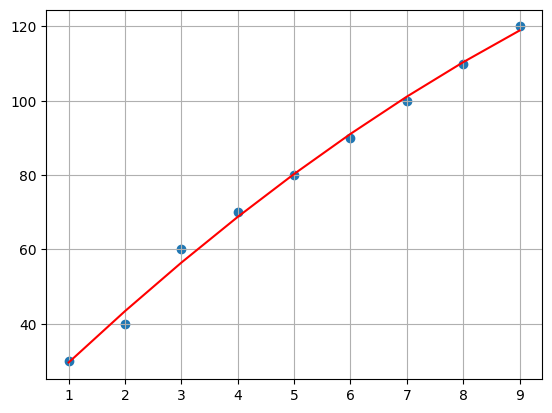

In [23]:
plt.plot(X, y_pred, color='red', label='Predicted (Poly Fit)')
plt.scatter(X, y,)
plt.grid()
plt.show()